#### Filtering US dataframe into TN - census tracts

Also, Adding percentiles category to the dataframe

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import pickle as pickle
from pylab import *
%matplotlib inline
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# imoporting SVI data for the entire US(county level) 
us_svi = gpd.read_file('../data/processed data/SVI - census tract level/SVI 2018 with HepVu census tracts/SVI2018_US_census_with_opioid_indicators.shp')

In [3]:
# include only the Wyoming(census level data )
filtered_svi_df = us_svi[us_svi['ST_ABBR'].isin(['TN'])]

In [4]:
# reset index
filtered_svi_df.reset_index(drop=True, inplace=True)

In [5]:
filtered_svi_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape_Leng,Shape_Area,NOD_Rate,geometry
0,47,TENNESSEE,TN,47001,Anderson,47001980100,"Census Tract 9801, Anderson County, Tennessee",16.991242,0,12,...,-999,0,12,-999.0,-999.0,8840,0.401396,0.004796,38.3,"POLYGON ((-84.30167 35.97862, -84.29421 35.982..."
1,47,TENNESSEE,TN,47009,Blount,47009980100,"Census Tract 9801, Blount County, Tennessee",2.483479,5,9,...,-999,0,12,0.0,100.0,2303,0.119941,0.000641,33.4,"POLYGON ((-84.01403 35.80881, -84.00916 35.812..."
2,47,TENNESSEE,TN,47017,Carroll,47017980100,"Census Tract 9801, Carroll County, Tennessee",18.889215,0,12,...,-999,0,12,-999.0,-999.0,701,0.356972,0.004889,18.3,"POLYGON ((-88.70523 35.82485, -88.70462 35.828..."
3,47,TENNESSEE,TN,47029,Cocke,47029980100,"Census Tract 9801, Cocke County, Tennessee",26.536730,0,12,...,-999,0,12,-999.0,-999.0,3,0.468744,0.006848,29.3,"POLYGON ((-83.28079 35.74700, -83.28016 35.749..."
4,47,TENNESSEE,TN,47037,Davidson,47037013000,"Census Tract 130, Davidson County, Tennessee",5.727093,910,386,...,-999,0,12,-999.0,-999.0,11383,0.210848,0.001592,34.8,"POLYGON ((-86.91273 36.19354, -86.91046 36.198..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,47,TENNESSEE,TN,47157,Shelby,47157003200,"Census Tract 32, Shelby County, Tennessee",0.552846,3860,329,...,3,163,108,4.6,3.0,4580,0.048356,0.000142,17.0,"POLYGON ((-90.00407 35.13561, -90.00381 35.135..."
1493,47,TENNESSEE,TN,47157,Shelby,47157003700,"Census Tract 37, Shelby County, Tennessee",0.268327,1175,108,...,6,132,71,11.6,6.1,7778,0.037767,0.000069,17.0,"POLYGON ((-90.03483 35.13866, -90.03374 35.138..."
1494,47,TENNESSEE,TN,47157,Shelby,47157003800,"Census Tract 38, Shelby County, Tennessee",0.276794,822,111,...,6,70,47,8.5,5.8,11363,0.033894,0.000071,17.0,"POLYGON ((-90.03349 35.14052, -90.03274 35.145..."
1495,47,TENNESSEE,TN,47157,Shelby,47157007300,"Census Tract 73, Shelby County, Tennessee",0.740207,4851,746,...,5,477,282,10.2,5.5,15361,0.060052,0.000190,17.0,"POLYGON ((-89.94575 35.11546, -89.94555 35.120..."


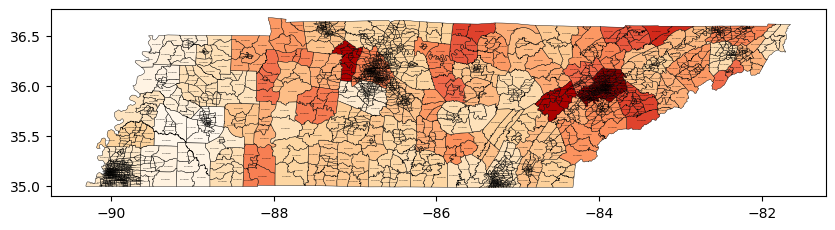

In [6]:
# Plot the data for the Washington DC, Virginia, Maryland, and West Virginia(county level)
ax = filtered_svi_df.plot(figsize=(10, 10), column="NOD_Rate", legend=False, cmap='OrRd', edgecolor='black',linewidth=0.3)

for idx, row in filtered_svi_df.iterrows():
    centroid = row.geometry.centroid
    county_name = row.FIPS
    ax.annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=0.5)

# Display the plot
plt.show()

##### Import overdose data(2018/county) from the df and adding percentiles.

In [7]:
# importing the overdose with county information
overdose_df = pd.read_excel('../data/HepVu_County_Opioid_Indicators_05DEC22.xlsx')


In [8]:
# convert the GEO ID to string
overdose_df['GEO ID'] = overdose_df['GEO ID'].astype(str)

In [9]:
# GEOID column id if any GEOID is less than 6 characters insert 0 at the beginning and make it 6 characters
overdose_df['GEO ID'] = overdose_df['GEO ID'].apply(lambda x: x.zfill(5))

In [10]:
overdose_df.head(3)

,GEO ID,State Abbreviation,County Name,Opioid Prescription Rate 2020,Narcotic Overdose Mortality Rate 2014,Narcotic Overdose Mortality Rate 2015,Narcotic Overdose Mortality Rate 2016,Narcotic Overdose Mortality Rate 2017,Narcotic Overdose Mortality Rate 2018,Narcotic Overdose Mortality Rate 2019,Narcotic Overdose Mortality Rate 2020
0,01001,AL,Autauga County,98.3,8.2,8.8,10.7,9.8,10.9,9.2,11.6
1,01003,AL,Baldwin County,65.0,18.0,20.0,16.6,15.1,14.9,14.5,27.4
2,01005,AL,Barbour County,22.8,4.4,4.5,5.7,5.8,5.2,5.7,7.6


In [11]:
# filter by State Abbreviation	
overdose_tn = overdose_df[overdose_df['State Abbreviation'].isin(['TN'])]

##### Adding percentils for the OD year 2018

In [17]:
overdose_tn['Narcotic Overdose Mortality Rate 2018'] = overdose_tn['Narcotic Overdose Mortality Rate 2018'].astype(float)
overdose_tn['percentile'] = pd.qcut(overdose_tn['Narcotic Overdose Mortality Rate 2018'], q=[0, 0.01, 0.1, 0.5, 0.9, 0.99, 1], labels=['<1%', '1%-10%', '10%-50%', '50%-90%', '90%-99%', '>99%'])

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_35976/825325370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overdose_tn['Narcotic Overdose Mortality Rate 2018'] = overdose_tn['Narcotic Overdose Mortality Rate 2018'].astype(float)
/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_35976/825325370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overdose_tn['percentile'] = pd.qcut(overdose_tn['Narcotic Overdose Mortality Rate 2018'], q=[0, 0.01, 0.1, 0.5, 0.9, 0.99, 1], labels=['

In [29]:
type(overdose_tn['percentile'][2429])

str

In [18]:
overdose_tn.head(3)

,GEO ID,State Abbreviation,County Name,Opioid Prescription Rate 2020,Narcotic Overdose Mortality Rate 2014,Narcotic Overdose Mortality Rate 2015,Narcotic Overdose Mortality Rate 2016,Narcotic Overdose Mortality Rate 2017,Narcotic Overdose Mortality Rate 2018,Narcotic Overdose Mortality Rate 2019,Narcotic Overdose Mortality Rate 2020,percetile,percentile
2429,47001,TN,Anderson County,51.9,26.6,33.9,39.9,55.5,38.3,41.1,71.2,90%-99%,90%-99%
2430,47003,TN,Bedford County,31.2,16.8,18.5,17.0,17.7,21.8,24.6,30.2,10%-50%,10%-50%
2431,47005,TN,Benton County,36.5,37.5,40.0,34.9,42.4,37.2,39.9,52.0,50%-90%,50%-90%


In [20]:
# merge the two dataframes
merged_df = pd.merge(filtered_svi_df, overdose_tn[['GEO ID','percentile']], left_on='STCNTY', right_on='GEO ID', how='left')

In [21]:

# drop GEO ID column
merged_df.drop(columns=['GEO ID'], inplace=True)

In [22]:
merged_df.head(3)

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape_Leng,Shape_Area,NOD_Rate,geometry,percentile
0,47,TENNESSEE,TN,47001,Anderson,47001980100,"Census Tract 9801, Anderson County, Tennessee",16.991242,0,12,...,0,12,-999.0,-999.0,8840,0.401396,0.004796,38.3,"POLYGON ((-84.30167 35.97862, -84.29421 35.982...",90%-99%
1,47,TENNESSEE,TN,47009,Blount,47009980100,"Census Tract 9801, Blount County, Tennessee",2.483479,5,9,...,0,12,0.0,100.0,2303,0.119941,0.000641,33.4,"POLYGON ((-84.01403 35.80881, -84.00916 35.812...",50%-90%
2,47,TENNESSEE,TN,47017,Carroll,47017980100,"Census Tract 9801, Carroll County, Tennessee",18.889215,0,12,...,0,12,-999.0,-999.0,701,0.356972,0.004889,18.3,"POLYGON ((-88.70523 35.82485, -88.70462 35.828...",10%-50%


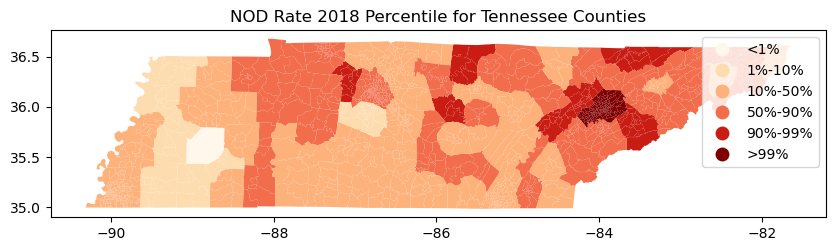

In [24]:
# Plot the percentiles for the overdose data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged_df.plot(column='percentile', ax=ax, legend=True, cmap='OrRd', linewidth=0.3)

plt.title('NOD Rate 2018 Percentile for Tennessee Counties')
plt.show()


#### Saving dataframe to a shapefile

In [25]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

In [32]:
gdf['percentile'] = gdf['percentile'].astype(str)

In [33]:

# Save the GeoDataFrame to a Shapefile
gdf.to_file("./data/processed data/SVI with HepVu census tracts/SVI2018 TN census tracts with death rate HepVu/SVI2018_TN_census_tracts_with_death_rate_HepVu.shp", driver='ESRI Shapefile')